# Proyecto Final: Prediccion de Dengue en Colombia

curso: Aprendizaje no supervisado

Projecto Final del curso.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Cargar los datos

In [2]:
dengue_df = pd.read_csv("../data/dengue_data_all_municipalities.csv")
dengue_df.shape


(1121, 1017)

In [3]:
dengue_df.head(10)

,Municipality code,Municipality,Population2007,Population2008,Population2009,Population2010,Population2011,Population2012,Population2013,Population2014,...,2019/w43,2019/w44,2019/w45,2019/w46,2019/w47,2019/w48,2019/w49,2019/w50,2019/w51,2019/w52
0,5001,Medellín,2286126,2309689,2331389,2353410,2379920,2410046,2428850,2436071,...,29,17,35,16,21,15,20,30,14,5
1,5002,Abejorral,20643,20944,21197,21355,20973,20067,19732,19796,...,0,0,0,0,0,0,0,0,0,0
2,5004,Abriaquí,2261,2290,2321,2353,2386,2424,2471,2488,...,0,0,0,0,0,0,0,0,0,0
3,5021,Alejandría,3935,4020,4096,4171,4244,4337,4419,4467,...,0,0,0,0,0,0,0,0,0,0
4,5030,Amagá,27996,28331,28624,28839,28776,28371,28259,28432,...,0,0,0,0,0,1,1,1,0,0
5,5031,Amalfi,21363,21745,22124,22515,22937,23380,23787,24145,...,0,0,0,0,0,0,0,0,1,0
6,5034,Andes,41223,41480,41830,42159,42281,42105,42118,42328,...,0,0,0,0,1,0,0,0,0,0
7,5036,Angelópolis,7868,7966,8029,7973,7291,6102,5684,5651,...,0,0,0,0,0,0,0,0,0,0
8,5038,Angostura,10559,10441,10499,10611,10744,10884,11007,11096,...,0,0,0,0,0,0,0,0,0,0
9,5040,Anorí,10108,10305,10545,10776,11077,11471,12077,13067,...,1,0,0,0,0,1,0,1,0,0


In [ ]:
print(dengue_df.columns.tolist())

['Municipality code', 'Municipality', 'Population2007', 'Population2008', 'Population2009', 'Population2010', 'Population2011', 'Population2012', 'Population2013', 'Population2014', 'Population2015', 'Population2016', 'Population2017', 'Population2018', 'Population2019', 'Cases2007', 'Cases2008', 'Cases2009', 'Cases2010', 'Cases2011', 'Cases2012', 'Cases2013', 'Cases2014', 'Cases2015', 'Cases2016', 'Cases2017', 'Cases2018', 'Cases2019', 'Age0-4(%)', 'Age5-14(%)', 'Age15-29(%)', 'Age>30(%)', 'AfrocolombianPopulation(%)', 'IndianPopulation(%)', 'PeoplewithDisabilities(%)', 'Peoplewhocannotreadorwrite(%)', 'Secondary/HigherEducation(%)', 'Employedpopulation(%)', 'Unemployedpopulation(%)', 'Peopledoinghousework(%)', 'Retiredpeople(%)', 'Men(%)', 'Women(%)', 'Householdswithoutwateraccess(%)', 'Householdswithoutinternetaccess(%)', 'Buildingstratification1(%)', 'Buildingstratification2(%)', 'Buildingstratification3(%)', 'Buildingstratification4(%)', 'Buildingstratification5(%)', 'Buildingstra

In [ ]:
print(f"cantidad de Municipios: {len(dengue_df['Municipality'].unique())}")
print(f"cantidad de Municipio code: {len(dengue_df['Municipality code'].unique())}")

cantidad de Municipios: 1036
cantidad de Municipio code: 1121


In [ ]:
dengue_df[dengue_df.isnull().any(axis=1)]

,Municipality code,Municipality,Population2007,Population2008,Population2009,Population2010,Population2011,Population2012,Population2013,Population2014,...,2019/w43,2019/w44,2019/w45,2019/w46,2019/w47,2019/w48,2019/w49,2019/w50,2019/w51,2019/w52
674,47570,Puebloviejo,25985,26261,26557,26828,27075,27320,27556,27835,...,1,0,0,2,0,1,0,1,0,0


Tenemos un municipio sin datos de temperatura y precipitacion, podemos omitir este municipio de nuestro analisis.

No hay duplicados

In [ ]:
weeks_df = dengue_df[['2007/w01', '2007/w02', '2007/w03', '2007/w04', '2007/w05', '2007/w06', '2007/w07', '2007/w08', '2007/w09', '2007/w10', '2007/w11', '2007/w12', '2007/w13', '2007/w14', '2007/w15', '2007/w16', '2007/w17', '2007/w18', '2007/w19', '2007/w20', '2007/w21', '2007/w22', '2007/w23', '2007/w24', '2007/w25', '2007/w26', '2007/w27', '2007/w28', '2007/w29', '2007/w30', '2007/w31', '2007/w32', '2007/w33', '2007/w34', '2007/w35', '2007/w36', '2007/w37', '2007/w38', '2007/w39', '2007/w40', '2007/w41', '2007/w42', '2007/w43', '2007/w44', '2007/w45', '2007/w46', '2007/w47', '2007/w48', '2007/w49', '2007/w50', '2007/w51', '2007/w52', '2008/w01', '2008/w02', '2008/w03', '2008/w04', '2008/w05', '2008/w06', '2008/w07', '2008/w08', '2008/w09', '2008/w10', '2008/w11', '2008/w12', '2008/w13', '2008/w14', '2008/w15', '2008/w16', '2008/w17', '2008/w18', '2008/w19', '2008/w20', '2008/w21', '2008/w22', '2008/w23', '2008/w24', '2008/w25', '2008/w26', '2008/w27', '2008/w28', '2008/w29', '2008/w30', '2008/w31', '2008/w32', '2008/w33', '2008/w34', '2008/w35', '2008/w36', '2008/w37', '2008/w38', '2008/w39', '2008/w40', '2008/w41', '2008/w42', '2008/w43', '2008/w44', '2008/w45', '2008/w46', '2008/w47', '2008/w48', '2008/w49', '2008/w50', '2008/w51', '2008/w52', '2009/w01', '2009/w02', '2009/w03', '2009/w04', '2009/w05', '2009/w06', '2009/w07', '2009/w08', '2009/w09', '2009/w10', '2009/w11', '2009/w12', '2009/w13', '2009/w14', '2009/w15', '2009/w16', '2009/w17', '2009/w18', '2009/w19', '2009/w20', '2009/w21', '2009/w22', '2009/w23', '2009/w24', '2009/w25', '2009/w26', '2009/w27', '2009/w28', '2009/w29', '2009/w30', '2009/w31', '2009/w32', '2009/w33', '2009/w34', '2009/w35', '2009/w36', '2009/w37', '2009/w38', '2009/w39', '2009/w40', '2009/w41', '2009/w42', '2009/w43', '2009/w44', '2009/w45', '2009/w46', '2009/w47', '2009/w48', '2009/w49', '2009/w50', '2009/w51', '2009/w52', '2010/w01', '2010/w02', '2010/w03', '2010/w04', '2010/w05', '2010/w06', '2010/w07', '2010/w08', '2010/w09', '2010/w10', '2010/w11', '2010/w12', '2010/w13', '2010/w14', '2010/w15', '2010/w16', '2010/w17', '2010/w18', '2010/w19', '2010/w20', '2010/w21', '2010/w22', '2010/w23', '2010/w24', '2010/w25', '2010/w26', '2010/w27', '2010/w28', '2010/w29', '2010/w30', '2010/w31', '2010/w32', '2010/w33', '2010/w34', '2010/w35', '2010/w36', '2010/w37', '2010/w38', '2010/w39', '2010/w40', '2010/w41', '2010/w42', '2010/w43', '2010/w44', '2010/w45', '2010/w46', '2010/w47', '2010/w48', '2010/w49', '2010/w50', '2010/w51', '2010/w52', '2011/w01', '2011/w02', '2011/w03', '2011/w04', '2011/w05', '2011/w06', '2011/w07', '2011/w08', '2011/w09', '2011/w10', '2011/w11', '2011/w12', '2011/w13', '2011/w14', '2011/w15', '2011/w16', '2011/w17', '2011/w18', '2011/w19', '2011/w20', '2011/w21', '2011/w22', '2011/w23', '2011/w24', '2011/w25', '2011/w26', '2011/w27', '2011/w28', '2011/w29', '2011/w30', '2011/w31', '2011/w32', '2011/w33', '2011/w34', '2011/w35', '2011/w36', '2011/w37', '2011/w38', '2011/w39', '2011/w40', '2011/w41', '2011/w42', '2011/w43', '2011/w44', '2011/w45', '2011/w46', '2011/w47', '2011/w48', '2011/w49', '2011/w50', '2011/w51', '2011/w52', '2012/w01', '2012/w02', '2012/w03', '2012/w04', '2012/w05', '2012/w06', '2012/w07', '2012/w08', '2012/w09', '2012/w10', '2012/w11', '2012/w12', '2012/w13', '2012/w14', '2012/w15', '2012/w16', '2012/w17', '2012/w18', '2012/w19', '2012/w20', '2012/w21', '2012/w22', '2012/w23', '2012/w24', '2012/w25', '2012/w26', '2012/w27', '2012/w28', '2012/w29', '2012/w30', '2012/w31', '2012/w32', '2012/w33', '2012/w34', '2012/w35', '2012/w36', '2012/w37', '2012/w38', '2012/w39', '2012/w40', '2012/w41', '2012/w42', '2012/w43', '2012/w44', '2012/w45', '2012/w46', '2012/w47', '2012/w48', '2012/w49', '2012/w50', '2012/w51', '2012/w52', '2013/w01', '2013/w02', '2013/w03', '2013/w04', '2013/w05', '2013/w06', '2013/w07', '2013/w08', '2013/w09', '2013/w10', '2013/w11', '2013/w12', '2013/w13', '2013/w14', '2013/w15', '2013/w16', '2013/w17', '2013/w18', '2013/w19', '2013/w20', '2013/w21', '2013/w22', '2013/w23', '2013/w24', '2013/w25', '2013/w26', '2013/w27', '2013/w28', '2013/w29', '2013/w30', '2013/w31', '2013/w32', '2013/w33', '2013/w34', '2013/w35', '2013/w36', '2013/w37', '2013/w38', '2013/w39', '2013/w40', '2013/w41', '2013/w42', '2013/w43', '2013/w44', '2013/w45', '2013/w46', '2013/w47', '2013/w48', '2013/w49', '2013/w50', '2013/w51', '2013/w52', '2014/w01', '2014/w02', '2014/w03', '2014/w04', '2014/w05', '2014/w06', '2014/w07', '2014/w08', '2014/w09', '2014/w10', '2014/w11', '2014/w12', '2014/w13', '2014/w14', '2014/w15', '2014/w16', '2014/w17', '2014/w18', '2014/w19', '2014/w20', '2014/w21', '2014/w22', '2014/w23', '2014/w24', '2014/w25', '2014/w26', '2014/w27', '2014/w28', '2014/w29', '2014/w30', '2014/w31', '2014/w32', '2014/w33', '2014/w34', '2014/w35', '2014/w36', '2014/w37', '2014/w38', '2014/w39', '2014/w40', '2014/w41', '2014/w42', '2014/w43', '2014/w44', '2014/w45', '2014/w46', '2014/w47', '2014/w48', '2014/w49', '2014/w50', '2014/w51', '2014/w52', '2015/w01', '2015/w02', '2015/w03', '2015/w04', '2015/w05', '2015/w06', '2015/w07', '2015/w08', '2015/w09', '2015/w10', '2015/w11', '2015/w12', '2015/w13', '2015/w14', '2015/w15', '2015/w16', '2015/w17', '2015/w18', '2015/w19', '2015/w20', '2015/w21', '2015/w22', '2015/w23', '2015/w24', '2015/w25', '2015/w26', '2015/w27', '2015/w28', '2015/w29', '2015/w30', '2015/w31', '2015/w32', '2015/w33', '2015/w34', '2015/w35', '2015/w36', '2015/w37', '2015/w38', '2015/w39', '2015/w40', '2015/w41', '2015/w42', '2015/w43', '2015/w44', '2015/w45', '2015/w46', '2015/w47', '2015/w48', '2015/w49', '2015/w50', '2015/w51', '2015/w52', '2016/w01', '2016/w02', '2016/w03', '2016/w04', '2016/w05', '2016/w06', '2016/w07', '2016/w08', '2016/w09', '2016/w10', '2016/w11', '2016/w12', '2016/w13', '2016/w14', '2016/w15', '2016/w16', '2016/w17', '2016/w18', '2016/w19', '2016/w20', '2016/w21', '2016/w22', '2016/w23', '2016/w24', '2016/w25', '2016/w26', '2016/w27', '2016/w28', '2016/w29', '2016/w30', '2016/w31', '2016/w32', '2016/w33', '2016/w34', '2016/w35', '2016/w36', '2016/w37', '2016/w38', '2016/w39', '2016/w40', '2016/w41', '2016/w42', '2016/w43', '2016/w44', '2016/w45', '2016/w46', '2016/w47', '2016/w48', '2016/w49', '2016/w50', '2016/w51', '2016/w52', '2017/w01', '2017/w02', '2017/w03', '2017/w04', '2017/w05', '2017/w06', '2017/w07', '2017/w08', '2017/w09', '2017/w10', '2017/w11', '2017/w12', '2017/w13', '2017/w14', '2017/w15', '2017/w16', '2017/w17', '2017/w18', '2017/w19', '2017/w20', '2017/w21', '2017/w22', '2017/w23', '2017/w24', '2017/w25', '2017/w26', '2017/w27', '2017/w28', '2017/w29', '2017/w30', '2017/w31', '2017/w32', '2017/w33', '2017/w34', '2017/w35', '2017/w36', '2017/w37', '2017/w38', '2017/w39', '2017/w40', '2017/w41', '2017/w42', '2017/w43', '2017/w44', '2017/w45', '2017/w46', '2017/w47', '2017/w48', '2017/w49', '2017/w50', '2017/w51', '2017/w52', '2018/w01', '2018/w02', '2018/w03', '2018/w04', '2018/w05', '2018/w06', '2018/w07', '2018/w08', '2018/w09', '2018/w10', '2018/w11', '2018/w12', '2018/w13', '2018/w14', '2018/w15', '2018/w16', '2018/w17', '2018/w18', '2018/w19', '2018/w20', '2018/w21', '2018/w22', '2018/w23', '2018/w24', '2018/w25', '2018/w26', '2018/w27', '2018/w28', '2018/w29', '2018/w30', '2018/w31', '2018/w32', '2018/w33', '2018/w34', '2018/w35', '2018/w36', '2018/w37', '2018/w38', '2018/w39', '2018/w40', '2018/w41', '2018/w42', '2018/w43', '2018/w44', '2018/w45', '2018/w46', '2018/w47', '2018/w48', '2018/w49', '2018/w50', '2018/w51', '2018/w52', '2019/w01', '2019/w02', '2019/w03', '2019/w04', '2019/w05', '2019/w06', '2019/w07', '2019/w08', '2019/w09', '2019/w10', '2019/w11', '2019/w12', '2019/w13', '2019/w14', '2019/w15', '2019/w16', '2019/w17', '2019/w18', '2019/w19', '2019/w20', '2019/w21', '2019/w22', '2019/w23', '2019/w24', '2019/w25', '2019/w26', '2019/w27', '2019/w28', '2019/w29', '2019/w30', '2019/w31', '2019/w32', '2019/w33', '2019/w34', '2019/w35', '2019/w36', '2019/w37', '2019/w38', '2019/w39', '2019/w40', '2019/w41', '2019/w42', '2019/w43', '2019/w44', '2019/w45', '2019/w46', '2019/w47', '2019/w48', '2019/w49', '2019/w50', '2019/w51', '2019/w52']]
population_df = dengue_df[['Population2007', 'Population2008', 'Population2009', 'Population2010', 'Population2011', 'Population2012', 'Population2013', 'Population2014', 'Population2015', 'Population2016', 'Population2017', 'Population2018', 'Population2019']]
casos_df = dengue_df[['Cases2007', 'Cases2008', 'Cases2009', 'Cases2010', 'Cases2011', 'Cases2012', 'Cases2013', 'Cases2014', 'Cases2015', 'Cases2016', 'Cases2017', 'Cases2018', 'Cases2019']]
demo_df = dengue_df[['Age0-4(%)', 'Age5-14(%)', 'Age15-29(%)', 'Age>30(%)', 'AfrocolombianPopulation(%)', 'IndianPopulation(%)', 'PeoplewithDisabilities(%)', 'Peoplewhocannotreadorwrite(%)', 'Secondary/HigherEducation(%)', 'Employedpopulation(%)', 'Unemployedpopulation(%)', 'Peopledoinghousework(%)', 'Retiredpeople(%)', 'Men(%)', 'Women(%)', 'Householdswithoutwateraccess(%)', 'Householdswithoutinternetaccess(%)', 'Buildingstratification1(%)', 'Buildingstratification2(%)', 'Buildingstratification3(%)', 'Buildingstratification4(%)', 'Buildingstratification5(%)', 'Buildingstratification6(%)', 'NumberofhospitalsperKm2', 'NumberofhousesperKm2']]

In [ ]:
dengue_df['Municipality']

0             Medellín
1            Abejorral
2             Abriaquí
3           Alejandría
4                Amagá
             ...      
1116          Yavaraté
1117    Puerto Carreño
1118      La Primavera
1119     Santa Rosalía
1120          Cumaribo
Name: Municipality, Length: 1120, dtype: object

In [ ]:
weeks_df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120],
           dtype='int64', length=1120)

**Reduccion de Columnas**

Dado que tenemos cerca de 1017 features donde algunos de ellos reprensentan el mismo dato, pero con su medida a traves del tiempo, en esos casos optamos por tener el dato mas reciente.


C:\Users\ce00021\AppData\Local\Temp\ipykernel_27996\3682398227.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reducidaini['ratioPoblacionCasos']=reducidaini['Cases2019']/reducidaini['Population2019']


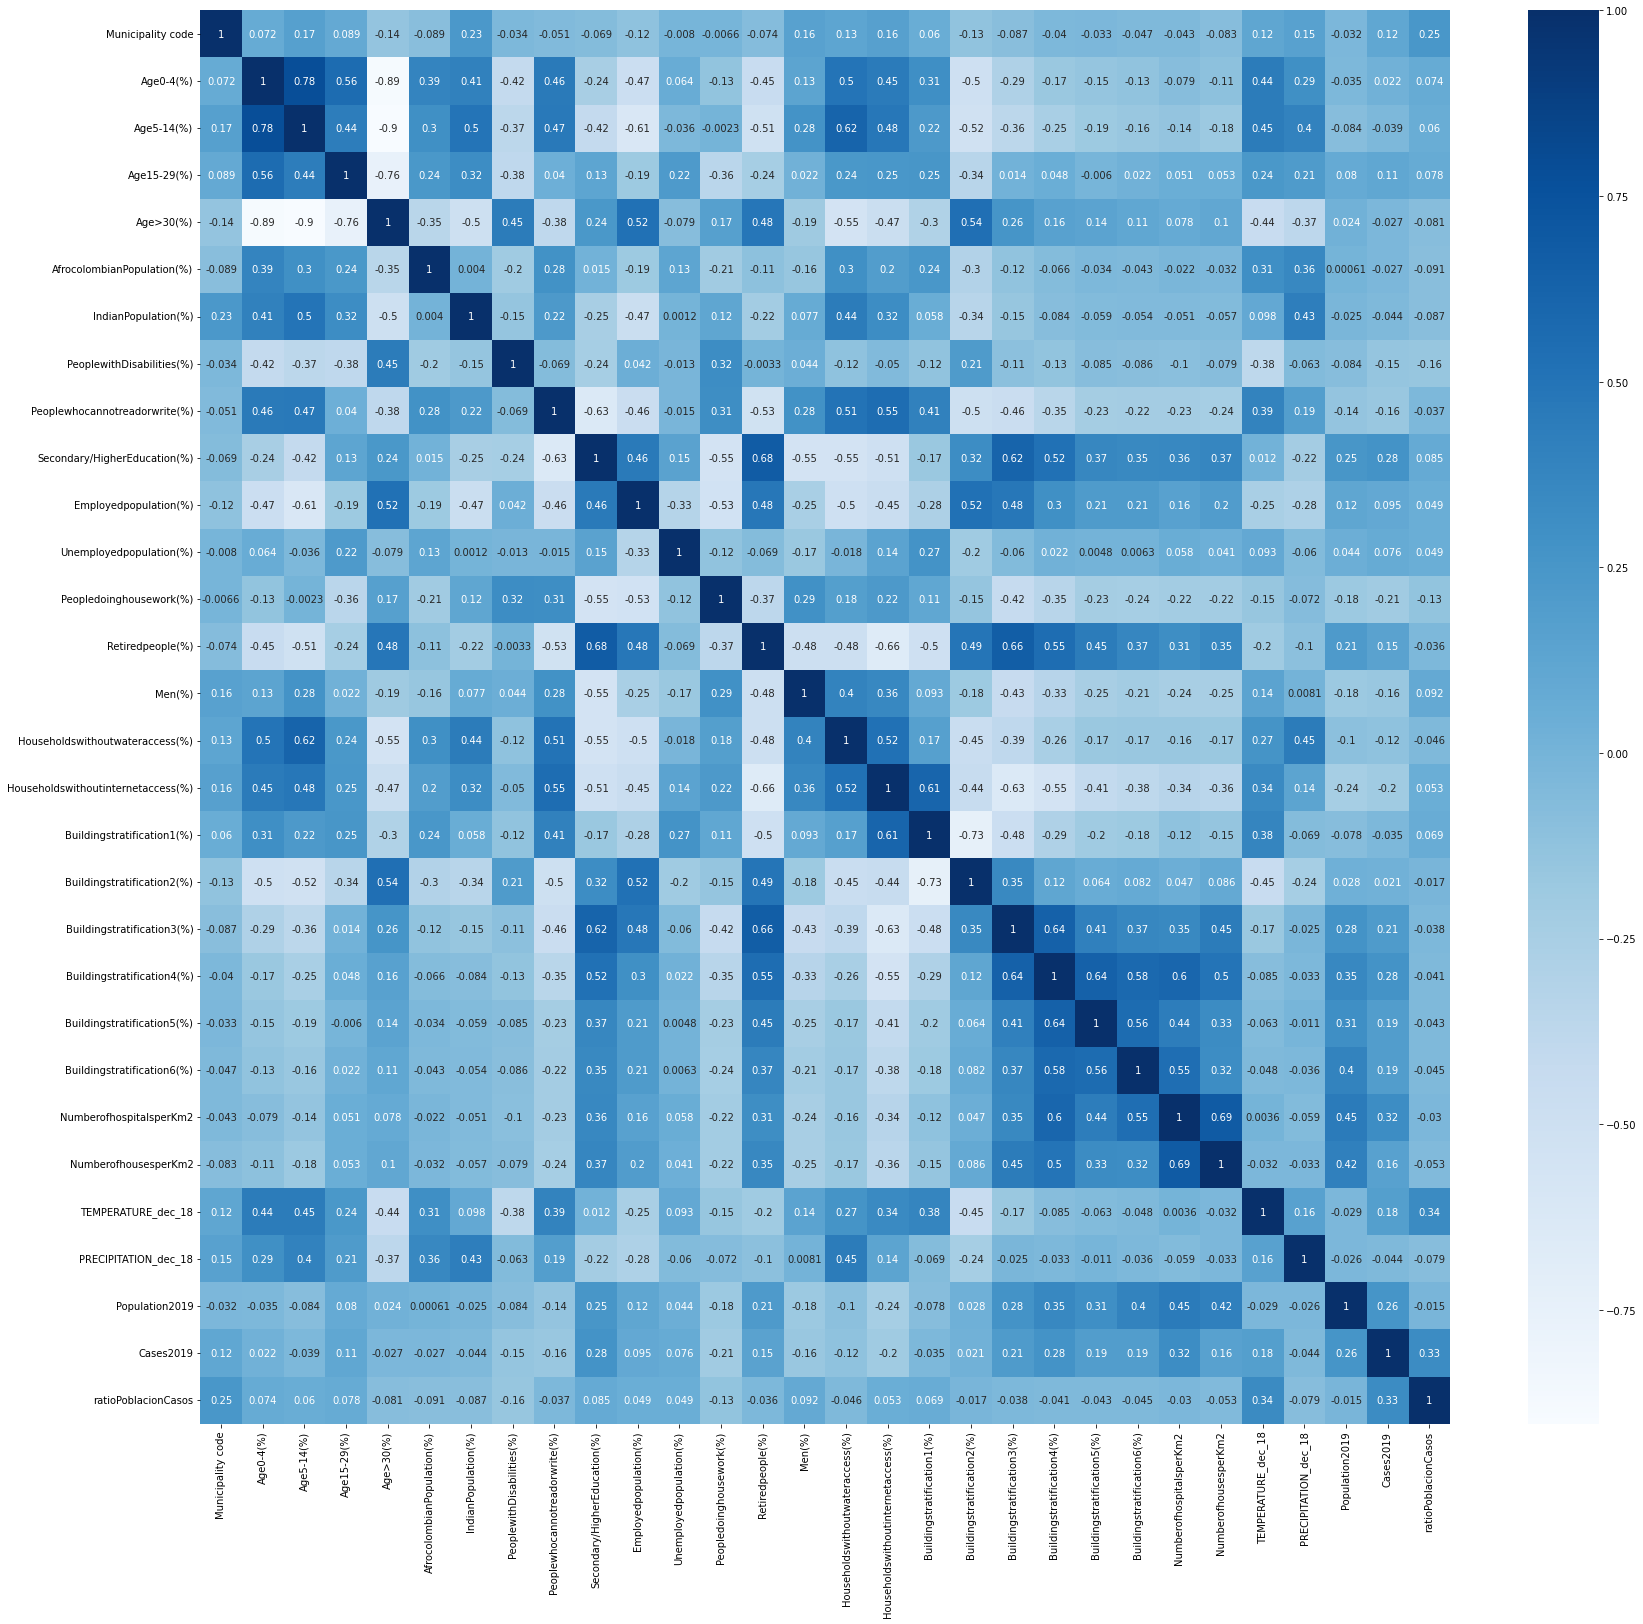

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121 entries, 0 to 1120
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Municipality code                   1121 non-null   int64  
 1   Age0-4(%)                           1121 non-null   float64
 2   Age5-14(%)                          1121 non-null   float64
 3   Age15-29(%)                         1121 non-null   float64
 4   Age>30(%)                           1121 non-null   float64
 5   AfrocolombianPopulation(%)          1121 non-null   float64
 6   IndianPopulation(%)                 1121 non-null   float64
 7   PeoplewithDisabilities(%)           1121 non-null   float64
 8   Peoplewhocannotreadorwrite(%)       1121 non-null   float64
 9   Secondary/HigherEducation(%)        1121 non-null   float64
 10  Employedpopulation(%)               1121 non-null   float64
 11  Unemployedpopulation(%)             1121 no

In [172]:
reducidaini=(dengue_df[['Municipality code','Age0-4(%)', 'Age5-14(%)', 'Age15-29(%)', 'Age>30(%)','AfrocolombianPopulation(%)', 
'IndianPopulation(%)', 'PeoplewithDisabilities(%)', 'Peoplewhocannotreadorwrite(%)', 'Secondary/HigherEducation(%)', 
'Employedpopulation(%)', 'Unemployedpopulation(%)', 'Peopledoinghousework(%)', 'Retiredpeople(%)', 'Men(%)', 
'Householdswithoutwateraccess(%)', 'Householdswithoutinternetaccess(%)', 'Buildingstratification1(%)', 
'Buildingstratification2(%)', 'Buildingstratification3(%)', 'Buildingstratification4(%)', 'Buildingstratification5(%)', 
'Buildingstratification6(%)', 'NumberofhospitalsperKm2', 'NumberofhousesperKm2','TEMPERATURE_dec_18','PRECIPITATION_dec_18',
'Population2019','Cases2019']])

reducidaini['ratioPoblacionCasos']=reducidaini['Cases2019']/reducidaini['Population2019']

import seaborn as sns
import matplotlib.pyplot as plt
X=reducidaini.copy()

corr_df = X.corr(method='pearson')

plt.figure(figsize=(28, 26))
sns.heatmap(corr_df, annot=True, cmap="Blues")

plt.show()


reducida=(reducidaini[['Municipality code', 'Age>30(%)','AfrocolombianPopulation(%)', 
'IndianPopulation(%)', 'Secondary/HigherEducation(%)','Men(%)', 'NumberofhousesperKm2','TEMPERATURE_dec_18','PRECIPITATION_dec_18',
'Population2019','Cases2019','ratioPoblacionCasos']])


descripcion=dengue_df[dengue_df['Municipality code']!=47570][['Municipality code','Municipality','AfrocolombianPopulation(%)','Cases2019','Population2019']]
descripcion['ratioPoblacionCasos']=descripcion['Cases2019']/descripcion['Population2019']

reducidaini.iloc[:,0:19].info()



In [19]:
print(reducidaini.iloc[:,19:].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121 entries, 0 to 1120
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Buildingstratification3(%)  1121 non-null   float64
 1   Buildingstratification4(%)  1121 non-null   float64
 2   Buildingstratification5(%)  1121 non-null   float64
 3   Buildingstratification6(%)  1121 non-null   float64
 4   NumberofhospitalsperKm2     1121 non-null   float64
 5   NumberofhousesperKm2        1121 non-null   float64
 6   TEMPERATURE_dec_18          1120 non-null   float64
 7   PRECIPITATION_dec_18        1120 non-null   float64
 8   Population2019              1121 non-null   int64  
 9   Cases2019                   1121 non-null   int64  
 10  ratioPoblacionCasos         1121 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 96.5 KB
None


In [173]:
from asyncio.windows_events import NULL
from cmath import nan

valoresNulos=reducida[np.isnan(reducida['TEMPERATURE_dec_18']) | np.isnan(reducida['PRECIPITATION_dec_18'])][['Municipality code','TEMPERATURE_dec_18','PRECIPITATION_dec_18']]
display(valoresNulos)

reducidalimpia=reducida[reducida['Municipality code']!=47570]
reducidainilimpia=reducidaini[reducidaini['Municipality code']!=47570]
reducidalimpia.describe()

,Municipality code,TEMPERATURE_dec_18,PRECIPITATION_dec_18
674,47570,NaN,NaN


,Municipality code,Age>30(%),AfrocolombianPopulation(%),IndianPopulation(%),Secondary/HigherEducation(%),Men(%),NumberofhousesperKm2,TEMPERATURE_dec_18,PRECIPITATION_dec_18,Population2019,Cases2019,ratioPoblacionCasos
count,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1.120000e+03,1120.000000,1120.000000
mean,38658.553571,50.217250,7.052393,7.360429,44.003848,50.814777,44.794701,21.347664,49.733369,4.407453e+04,113.231250,0.003060
std,26544.627772,7.752337,19.319731,19.075145,9.310005,1.879361,211.096720,5.610472,57.995459,2.601129e+05,443.491883,0.005449
min,5001.000000,19.130000,0.000000,0.000000,15.020000,46.110000,0.010674,4.183894,0.902079,2.880000e+02,0.000000,0.000000
25%,15675.250000,45.182500,0.180000,0.030000,37.730000,49.620000,5.264703,17.057504,17.721469,6.636500e+03,1.000000,0.000051
50%,25831.000000,51.045000,0.410000,0.140000,42.555000,50.740000,11.735330,21.834375,37.102827,1.281500e+04,10.000000,0.000759
75%,66485.000000,56.035000,1.617500,2.715000,49.290000,51.890000,24.145374,26.829089,60.799553,2.747125e+04,75.000000,0.003531
max,99773.000000,69.500000,97.300000,98.580000,77.330000,67.510000,4876.176471,28.674008,609.078796,7.592871e+06,8258.000000,0.047612


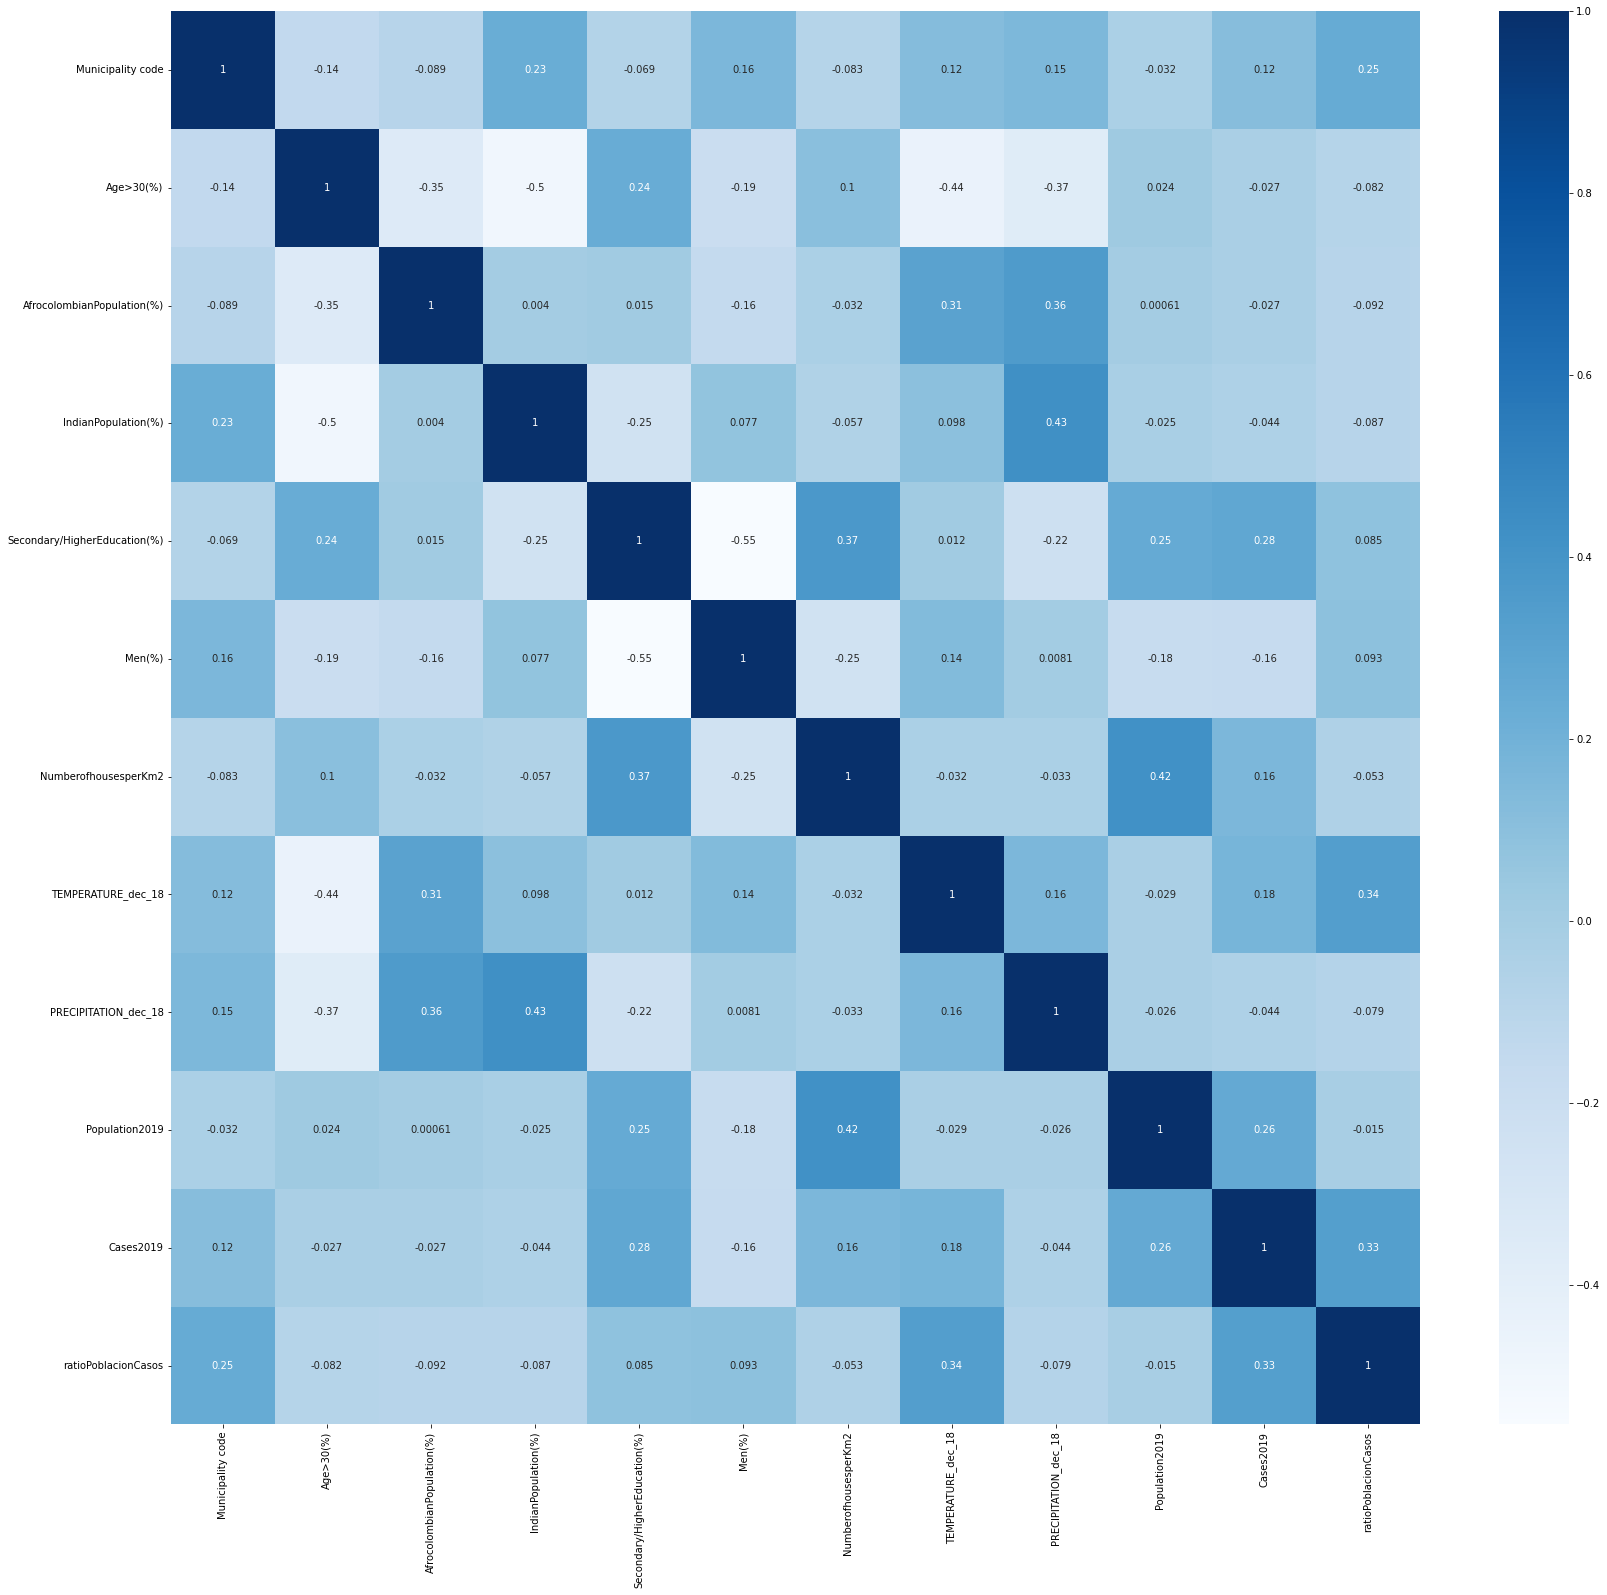

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt

X=reducidalimpia.copy()


corr_df = X.corr(method='pearson')

plt.figure(figsize=(28, 26))
sns.heatmap(corr_df, annot=True, cmap="Blues")

plt.show()

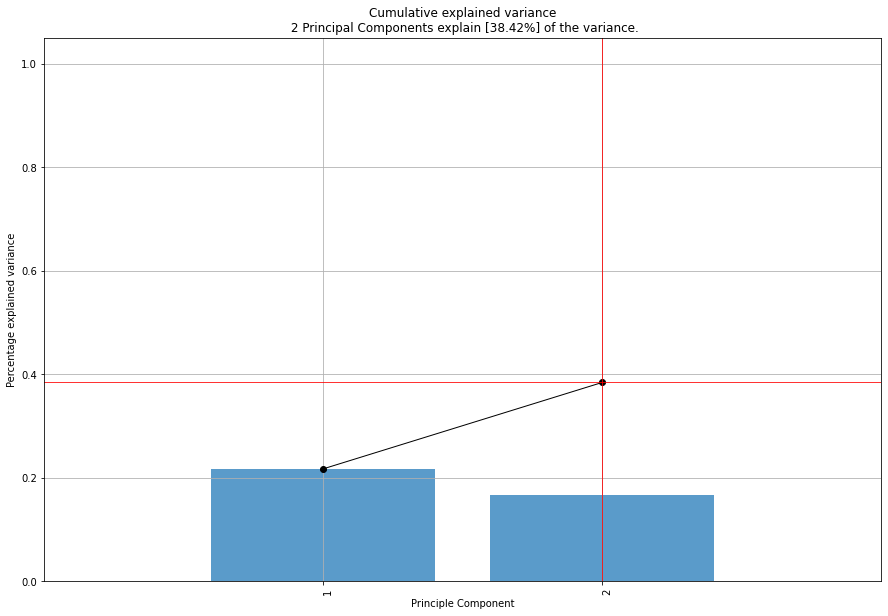

,PC1,PC2
Municipality code,-0.198766,0.130946
Age>30(%),0.441351,-0.285166
AfrocolombianPopulation(%),-0.184249,0.279625
IndianPopulation(%),-0.366064,0.128410
Secondary/HigherEducation(%),0.403368,0.333410
Men(%),-0.316604,-0.265333
NumberofhousesperKm2,0.280432,0.304709
TEMPERATURE_dec_18,-0.257010,0.378506
PRECIPITATION_dec_18,-0.352415,0.204879
Population2019,0.218563,0.331855


<Figure size 432x288 with 0 Axes>

In [176]:
from pca import pca

model = pca(2,normalize=True,verbose=True)
results = model.fit_transform(X)
fig, ax = model.plot()

loadings_pca=model.results['loadings'].transpose()
display(loadings_pca)




0.36209003008345036


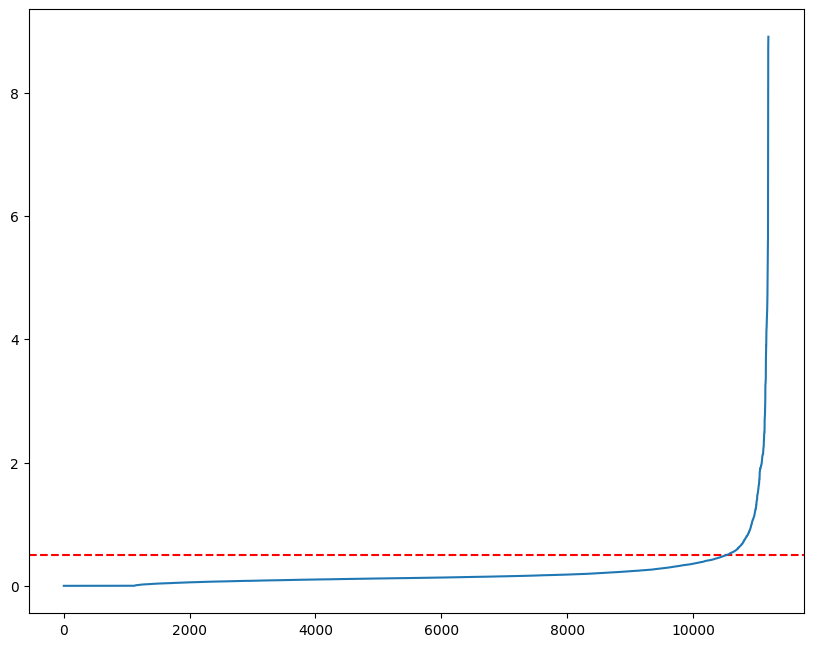

In [ ]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors = 10)
nbrs = neigh.fit(results['PC'])
distancias, indices = nbrs.kneighbors(results['PC'])
distancias = np.sort(distancias.flatten())
fig=plt.figure(figsize=(10,8), dpi= 100, facecolor='w', edgecolor='k')
plt.axhline(y = 0.5, color = 'r', linestyle = '--')
plt.plot(distancias)

from kneed import KneeLocator

i = np.arange(len(distancias))
knee = KneeLocator(i, distancias, S=1, curve='convex', direction='increasing', interp_method='polynomial')

print(distancias[knee.knee])




array([-1,  0,  1,  2,  3,  4,  5], dtype=int64)

-1


,PC1,PC2,cluster
"(5001, Medellín)",7.481566,7.976236,-1
"(5088, Bello)",4.053194,2.467364,-1
"(5266, Envigado)",4.960237,2.177600,-1
"(5360, Itagüí)",9.053116,7.861435,-1
"(5361, Ituango)",-1.448130,-2.223606,-1
"(5631, Sabaneta)",5.800457,3.587367,-1
"(8001, Barranquilla)",5.845056,6.862359,-1
"(8758, Soledad)",4.870264,5.196582,-1
"(11001, Bogotá, D.C.)",11.088129,11.183995,-1
"(13001, Cartagena de Indias)",3.281951,4.779942,-1


0


,PC1,PC2,cluster
"(5002, Abejorral)",0.316350,-1.716989,0
"(5004, Abriaquí)",0.279068,-1.491681,0
"(5021, Alejandría)",0.592672,-0.920740,0
"(5030, Amagá)",1.301039,-0.142358,0
"(5031, Amalfi)",0.107869,-0.506677,0
"(5034, Andes)",0.323766,-1.110088,0
"(5036, Angelópolis)",0.571930,-0.894210,0
"(5038, Angostura)",0.041749,-1.138306,0
"(5040, Anorí)",-0.816960,-0.559511,0
"(5042, Santa Fé de Antioquia)",0.729930,-0.041879,0


1


,PC1,PC2,cluster
"(5475, Murindó)",-4.429449,1.677443,1
"(27025, Alto Baudó)",-4.342138,1.479540,1
"(27073, Bagadó)",-3.789501,1.189133,1
"(27077, Bajo Baudó)",-4.079260,1.703438,1
"(27099, Bojayá)",-4.585906,1.753381,1
"(27150, Carmen del Darién)",-4.384169,1.614705,1
"(27250, El Litoral del San Juan)",-4.088011,1.510955,1
"(27372, Juradó)",-4.328658,1.908884,1
"(27413, Lloró)",-3.779397,1.512803,1
"(27425, Medio Atrato)",-3.881752,1.492065,1


2


,PC1,PC2,cluster
"(5873, Vigía del Fuerte)",-3.165481,2.319876,2
"(19418, López de Micay)",-3.206758,1.659487,2
"(19809, Timbiquí)",-2.899605,1.771911,2
"(27050, Atrato)",-2.700946,2.320037,2
"(27075, Bahía Solano)",-2.981251,2.475279,2
"(27135, El Cantón del San Pablo)",-2.664809,2.372870,2
"(27450, Medio San Juan)",-2.766710,2.114176,2
"(27491, Nóvita)",-2.676073,1.874229,2
"(27580, Río Iró)",-3.160568,1.905302,2
"(27600, Río Quito)",-2.821343,2.397452,2


3


,PC1,PC2,cluster
"(5380, La Estrella)",3.175300,1.160982,3
"(15001, Tunja)",3.397413,0.848374,3
"(17001, Manizales)",3.063478,1.176923,3
"(25126, Cajicá)",3.137839,0.840943,3
"(25175, Chía)",3.421809,0.967591,3


4


,PC1,PC2,cluster
"(25307, Girardot)",2.204177,1.961936,4
"(47001, Santa Marta)",2.061791,2.107490,4
"(66001, Pereira)",2.326357,1.796350,4
"(68547, Piedecuesta)",1.871083,1.830546,4
"(76520, Palmira)",2.139670,1.971550,4


5


,PC1,PC2,cluster
"(91263, El Encanto)",-5.035584,1.240493,5
"(91405, La Chorrera)",-5.584219,1.193425,5
"(91430, La Victoria)",-5.242990,1.169757,5
"(91460, Mirití - Paraná)",-5.098410,1.338304,5
"(91536, Puerto Arica)",-5.173733,1.458953,5
"(94343, Barranco Minas)",-5.498056,1.153201,5
"(94883, San Felipe)",-5.541402,1.516600,5
"(94884, Puerto Colombia)",-5.802836,1.023859,5
"(94886, Cacahual)",-5.703747,1.009948,5
"(94887, Pana Pana)",-5.752622,0.777255,5


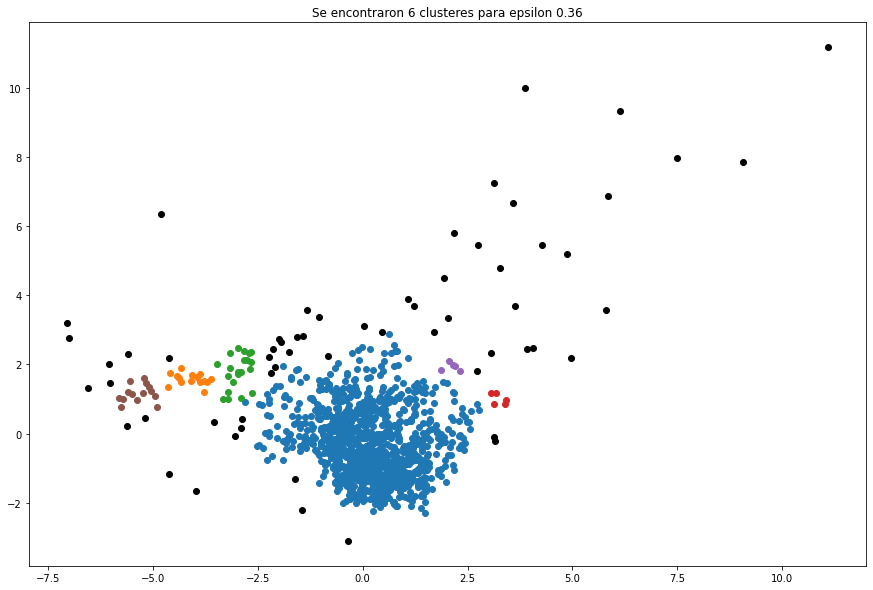

In [ ]:
from sklearn.cluster import DBSCAN
X=results['PC'].to_numpy()


db = DBSCAN(eps = 0.364, min_samples = 5).fit(X)
clusteres = db.labels_

n_clusteres = len(set(clusteres)) - (1 if -1 in clusteres else 0)
resultado = pd.DataFrame(X).assign(Cluster = clusteres)
plt.figure(figsize=(15,10))
for k in np.unique(clusteres):
    if k != -1:
        plt.scatter(
            x = resultado.loc[resultado.Cluster == k, 0], 
            y = resultado.loc[resultado.Cluster == k, 1]
            )
    else:
        plt.scatter(
            x = resultado.loc[resultado.Cluster == k, 0], 
            y = resultado.loc[resultado.Cluster == k, 1],
            c = "black"
            )
plt.title('Se encontraron %d clusteres para epsilon %0.2f' % (n_clusteres, 0.364))

resultado


display(np.unique(clusteres))
X=X=results['PC']
X["cluster"]=clusteres
X.index=descripcion


for k in np.unique(clusteres):
    print(k)
    display(X[X['cluster']==k].head(10))

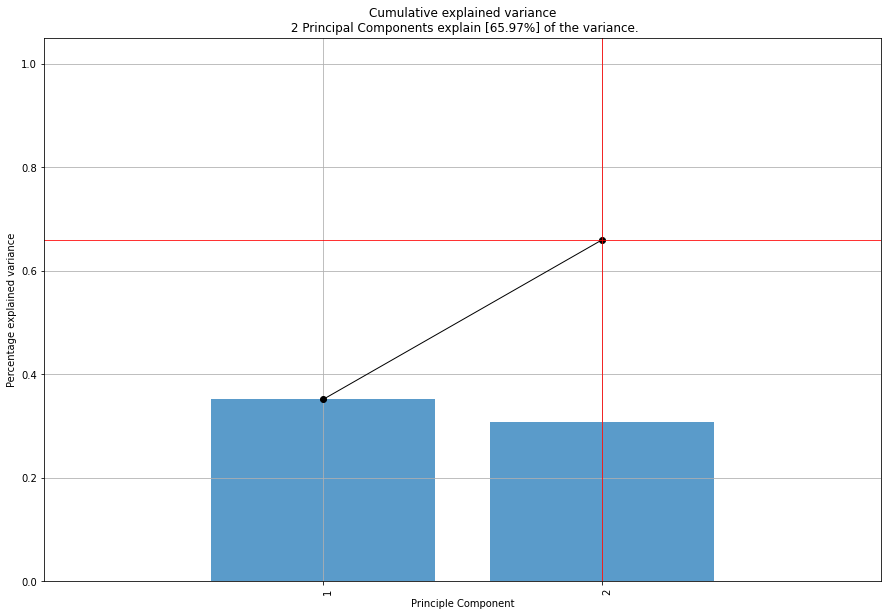

,PC1,PC2
Municipality code,-0.343295,0.594987
Secondary/HigherEducation(%),0.636570,0.335246
NumberofhousesperKm2,0.671440,0.157954
ratioPoblacionCasos,-0.161537,0.713198


0.17411113607939727


,0,1,Cluster
0,8.659969,1.295863,-1
1,-0.286582,-1.552954,0
2,0.487254,-1.028485,0
3,0.055698,-1.369494,0
4,1.219265,-0.767103,-1
...,...,...,...
1115,-1.574894,0.495500,-1
1116,-0.943043,2.392266,7
1117,-1.431640,1.994663,-1
1118,-1.172138,1.858207,-1


<Figure size 432x288 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

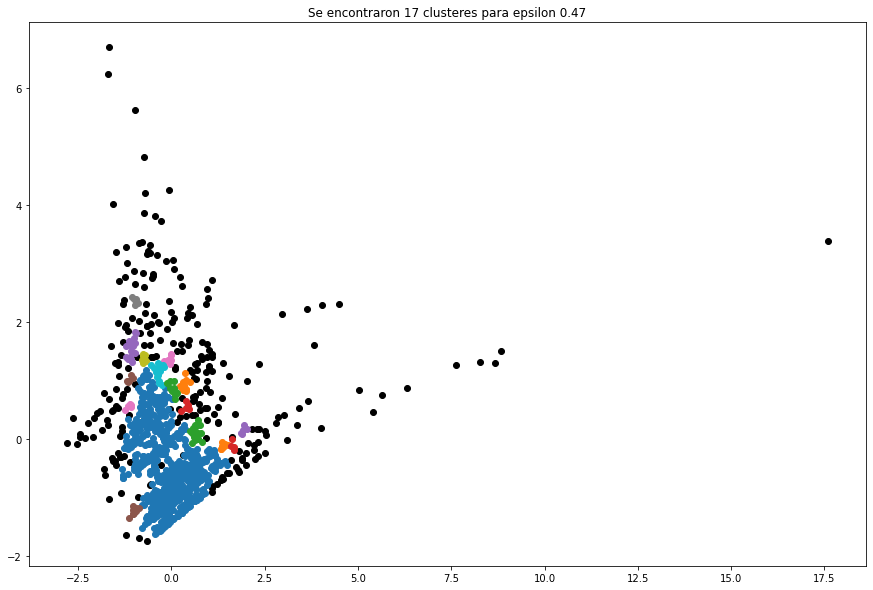

In [ ]:
X_pocasfeatures=reducida[["Municipality code",'Secondary/HigherEducation(%)','NumberofhousesperKm2','ratioPoblacionCasos']]
model = pca(2,normalize=True,verbose=True)
results = model.fit_transform(X_pocasfeatures)
fig, ax = model.plot()

loadings_pca=model.results['loadings'].transpose()
display(loadings_pca)

neigh = NearestNeighbors(n_neighbors = 5)
nbrs = neigh.fit(results['PC'])
distancias, indices = nbrs.kneighbors(results['PC'])
distancias = np.sort(distancias.flatten())
fig=plt.figure(figsize=(10,8), dpi= 100, facecolor='w', edgecolor='k')
#plt.axhline(y = 0.5, color = 'r', linestyle = '--')
#plt.plot(distancias)

from kneed import KneeLocator

i = np.arange(len(distancias))
knee = KneeLocator(i, distancias, S=1, curve='convex', direction='increasing', interp_method='polynomial')

print(distancias[knee.knee])


from sklearn.cluster import DBSCAN
X=results['PC'].to_numpy()


db = DBSCAN(eps = 0.13, min_samples = 5).fit(X)
clusteres = db.labels_

n_clusteres = len(set(clusteres)) - (1 if -1 in clusteres else 0)
resultado = pd.DataFrame(X).assign(Cluster = clusteres)
plt.figure(figsize=(15,10))
for k in np.unique(clusteres):
    if k != -1:
        plt.scatter(
            x = resultado.loc[resultado.Cluster == k, 0], 
            y = resultado.loc[resultado.Cluster == k, 1]
            )
    else:
        plt.scatter(
            x = resultado.loc[resultado.Cluster == k, 0], 
            y = resultado.loc[resultado.Cluster == k, 1],
            c = "black"
            )
plt.title('Se encontraron %d clusteres para epsilon %0.2f' % (n_clusteres, 0.47))

resultado



0.061264583495267734


,0,1,Cluster
0,-0.467409,9.749949,-1
1,-0.561736,-0.155681,0
2,-0.426242,-0.200218,0
3,-0.561736,-0.169202,0
4,-0.466291,0.274680,0
...,...,...,...
1115,-0.561736,-0.212159,0
1116,1.357246,-0.210245,5
1117,1.161981,-0.211758,5
1118,0.816334,-0.211120,0


<Figure size 1000x800 with 0 Axes>

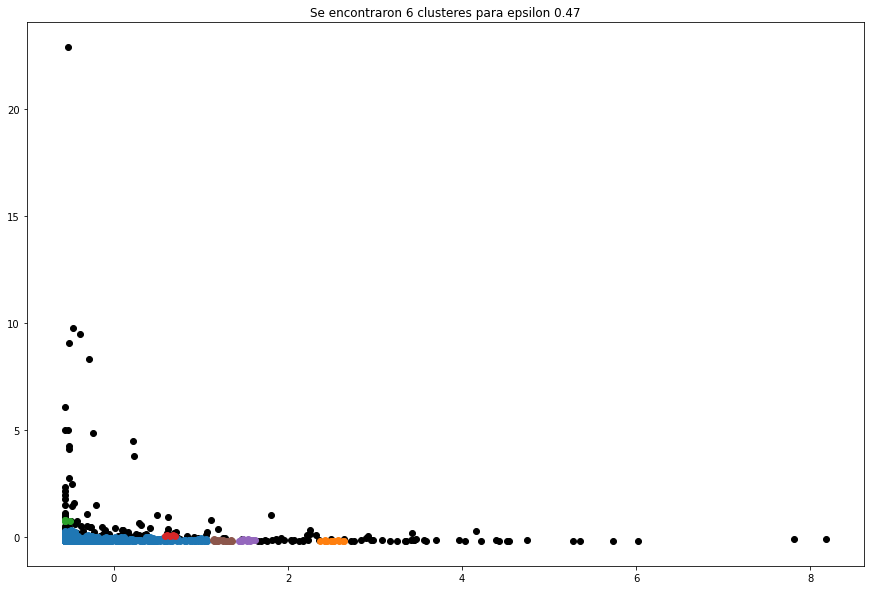

In [ ]:
from sklearn.preprocessing import StandardScaler

#Estandarizamos antes de hacer el analisis de SVD

scaler = StandardScaler()
X_2features = reducidalimpia[["ratioPoblacionCasos","NumberofhousesperKm2"]]
X_2features.index=descripcion
X_2features_Scaled= scaler.fit_transform(X_2features)
X_2features_Scaled=pd.DataFrame(X_2features_Scaled, index=reducidalimpia['Municipality code'],    columns=["ratioPoblacionCasos","NumberofhousesperKm2"])

neigh = NearestNeighbors(n_neighbors = 5)
nbrs = neigh.fit(X_2features_Scaled)
distancias, indices = nbrs.kneighbors(X_2features_Scaled)
distancias = np.sort(distancias.flatten())
fig=plt.figure(figsize=(10,8), dpi= 100, facecolor='w', edgecolor='k')
#plt.axhline(y = 0.5, color = 'r', linestyle = '--')
#plt.plot(distancias)

from kneed import KneeLocator

i = np.arange(len(distancias))
knee = KneeLocator(i, distancias, S=1, curve='convex', direction='increasing', interp_method='polynomial')

print(distancias[knee.knee])


from sklearn.cluster import DBSCAN
X=X_2features_Scaled.to_numpy()


db = DBSCAN(eps = 0.0612, min_samples = 5).fit(X)
clusteres = db.labels_

n_clusteres = len(set(clusteres)) - (1 if -1 in clusteres else 0)
resultado = pd.DataFrame(X).assign(Cluster = clusteres)
plt.figure(figsize=(15,10))
for k in np.unique(clusteres):
    if k != -1:
        plt.scatter(
            x = resultado.loc[resultado.Cluster == k, 0], 
            y = resultado.loc[resultado.Cluster == k, 1]
            )
    else:
        plt.scatter(
            x = resultado.loc[resultado.Cluster == k, 0], 
            y = resultado.loc[resultado.Cluster == k, 1],
            c = "black"
            )
plt.title('Se encontraron %d clusteres para epsilon %0.2f' % (n_clusteres, 0.47))

resultado

In [ ]:
#display(X_2features.sort_values('ratioPoblacionCasos', ascending=False))
#display(X_2features.sort_values('NumberofhousesperKm2', ascending=False))

#X_2features.describe()
display(np.unique(clusteres))
X_2features["cluster"]=clusteres
X_2features

for k in np.unique(clusteres):
    print(k)
    display(X_2features[X_2features['cluster']==k].head(10))



array([-1,  0,  1,  2,  3,  4,  5], dtype=int64)

-1


C:\Users\ce00021\AppData\Local\Temp\ipykernel_8292\1018799538.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_2features["cluster"]=clusteres


,ratioPoblacionCasos,NumberofhousesperKm2,cluster
"(5001, Medellín)",0.000514,2102.057895,-1
"(5045, Apartadó)",0.004637,57.013180,-1
"(5079, Barbosa)",0.000751,76.572115,-1
"(5088, Bello)",0.000163,1092.288732,-1
"(5129, Caldas)",0.000159,181.827068,-1
"(5190, Cisneros)",0.002743,67.282609,-1
"(5212, Copacabana)",0.000438,350.728571,-1
"(5266, Envigado)",0.000258,937.884615,-1
"(5360, Itagüí)",0.000197,4876.176471,-1
"(5376, La Ceja)",0.000030,133.709924,-1


0


,ratioPoblacionCasos,NumberofhousesperKm2,cluster
"(5002, Abejorral)",0.000000,11.945674,0
"(5004, Abriaquí)",0.000738,2.548276,0
"(5021, Alejandría)",0.000000,9.092715,0
"(5030, Amagá)",0.000520,102.752941,0
"(5031, Amalfi)",0.000226,5.373366,0
"(5034, Andes)",0.000023,26.946548,0
"(5036, Angelópolis)",0.000000,19.735632,0
"(5038, Angostura)",0.000000,7.994898,0
"(5040, Anorí)",0.000854,3.178300,0
"(5042, Santa Fé de Antioquia)",0.003196,15.466934,0


1


,ratioPoblacionCasos,NumberofhousesperKm2,cluster
"(5425, Maceo)",0.017157,5.807425,1
"(15377, Labranzagrande)",0.016281,1.670400,1
"(25530, Paratebueno)",0.016845,2.872027,1
"(41020, Algeciras)",0.017113,10.242105,1
"(41206, Colombia)",0.016396,1.290931,1
"(50124, Cabuyaro)",0.016639,1.835973,1
"(50251, El Castillo)",0.016275,3.438672,1
"(68190, Cimitarra)",0.015970,2.582174,1
"(73168, Chaparral)",0.016296,6.915725,1
"(73547, Piedras)",0.017367,5.313019,1


2


,ratioPoblacionCasos,NumberofhousesperKm2,cluster
"(5308, Girardota)",0.000320,194.871795,2
"(5615, Rionegro)",0.000014,195.841837,2
"(15238, Duitama)",0.000024,205.994624,2
"(15759, Sogamoso)",0.000023,197.235577,2
"(25899, Zipaquirá)",0.000007,205.324873,2


3


,ratioPoblacionCasos,NumberofhousesperKm2,cluster
"(8558, Polonuevo)",0.006547,54.069444,3
"(25875, Villeta)",0.006396,64.340426,3
"(70221, Coveñas)",0.006775,60.351351,3
"(70418, Los Palmitos)",0.006277,49.712000,3
"(70670, Sampués)",0.006870,51.382775,3


4


,ratioPoblacionCasos,NumberofhousesperKm2,cluster
"(13654, San Jacinto)",0.011638,14.276498,4
"(13688, Santa Rosa del Sur)",0.011068,3.339091,4
"(41132, Campoalegre)",0.011893,13.788200,4
"(47170, Chivolo)",0.011754,8.778409,4
"(47460, Nueva Granada)",0.010935,3.888393,4
"(47798, Tenerife)",0.011008,6.336798,4
"(54245, El Carmen)",0.011577,2.085897,4
"(70823, Tolú Viejo)",0.011167,18.746377,4
"(73226, Cunday)",0.010918,5.407336,4
"(73504, Ortega)",0.011407,8.608290,4


5


,ratioPoblacionCasos,NumberofhousesperKm2,cluster
"(15518, Pajarito)",0.009583,2.052795,5
"(18205, Curillo)",0.009892,4.969499,5
"(20443, Manaure Balcón del Cesar)",0.009352,21.452381,5
"(47058, Ariguaní)",0.009879,6.586572,5
"(50568, Puerto Gaitán)",0.010052,0.599806,5
"(50680, San Carlos de Guaroa)",0.009446,4.316893,5
"(54099, Bochalema)",0.009263,12.360465,5
"(54206, Convención)",0.009670,6.118215,5
"(54800, Teorama)",0.010270,4.477700,5
"(68385, Landázuri)",0.010399,4.882540,5


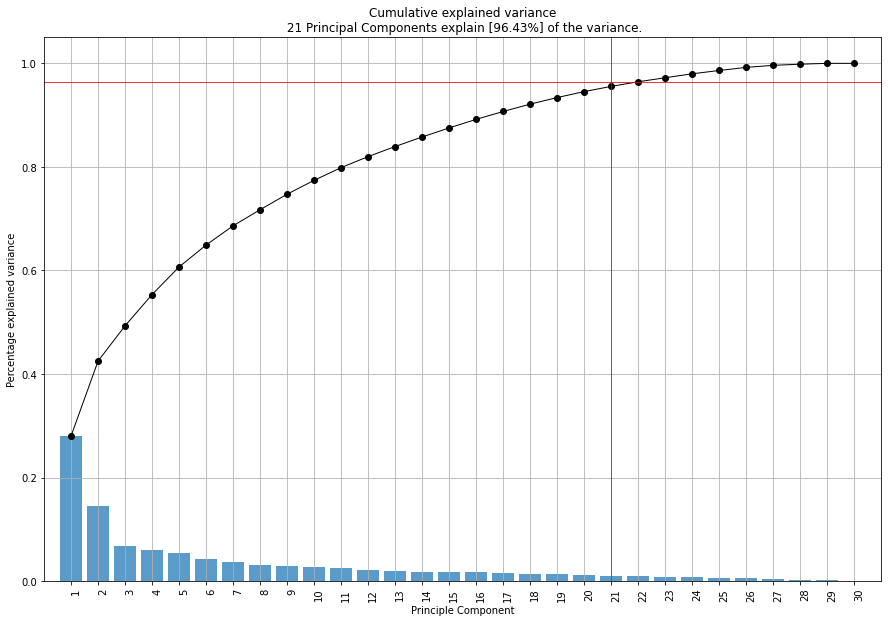

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
Municipality code,-0.056886,0.043731,-0.022049,-0.113373,0.442350,0.321293,-0.263727,0.314189,0.342159,0.154277,...,0.278395,-0.375219,-0.044523,-0.032725,-0.327955,0.043476,-0.118855,-0.066233,0.101722,0.004906
Age0-4(%),-0.233001,0.252084,-0.017994,-0.113743,-0.053824,-0.071283,0.144312,-0.092224,-0.108993,-0.024727,...,0.011704,-0.102766,-0.200401,-0.162188,-0.212178,0.003467,-0.006632,0.068023,-0.084949,0.054647
Age5-14(%),-0.262633,0.199441,0.104334,-0.160567,0.059847,-0.057053,0.074439,-0.069713,-0.125456,-0.002205,...,0.075189,-0.122002,-0.095719,-0.133682,-0.089760,-0.104958,-0.019390,0.228444,-0.221899,-0.171966
Age15-29(%),-0.114329,0.301675,-0.122565,-0.134756,-0.062521,0.212618,0.352386,0.054624,0.136781,-0.159004,...,-0.218367,0.008700,0.102376,-0.137661,0.079041,-0.048330,0.118462,-0.293271,0.399934,0.063420
Age>30(%),0.244072,-0.286147,-0.004891,0.166517,0.005326,-0.031925,-0.210754,0.040288,0.043272,0.067915,...,0.039549,0.088497,0.063710,0.165565,0.072405,0.073875,-0.032838,-0.028676,-0.011005,0.054378
AfrocolombianPopulation(%),-0.104381,0.175368,-0.068485,-0.012117,-0.422054,-0.199735,-0.374410,-0.122425,0.196195,-0.142325,...,0.140865,-0.368477,0.011359,-0.050139,0.117839,0.123818,0.160711,-0.285051,-0.041241,0.347049
IndianPopulation(%),-0.156858,0.135921,0.295475,-0.148259,0.082007,0.350136,0.010252,0.081576,-0.089994,0.282723,...,-0.029799,0.350375,-0.157027,0.228422,0.137278,-0.018093,0.126940,-0.063814,-0.163544,0.458581
PeoplewithDisabilities(%),0.049381,-0.279831,0.173681,0.143156,-0.027175,0.178577,-0.161493,-0.102302,0.317676,-0.248497,...,-0.331732,0.100844,-0.235354,-0.345691,-0.234150,-0.417160,0.265148,-0.069879,-0.156565,0.013055
Peoplewhocannotreadorwrite(%),-0.240452,-0.009965,0.087743,0.176780,-0.068884,-0.318956,-0.139873,-0.029102,-0.114148,0.058797,...,-0.023210,0.239590,-0.122983,0.037911,-0.451308,0.102307,-0.216814,-0.140712,0.306757,0.297069
Secondary/HigherEducation(%),0.239770,0.198668,-0.255619,-0.050455,-0.105854,0.135394,-0.005883,0.058317,-0.069185,0.133607,...,0.107489,-0.052957,0.026866,0.043249,0.158822,-0.194789,0.255154,-0.134489,-0.028474,-0.057424


3.439361098725832


,Municipality code,Municipality,AfrocolombianPopulation(%),Cases2019,Population2019,ratioPoblacionCasos,cluster,Cluster
0,5001,Medellín,2.51,1276,2483545,0.000514,2,-1
1,5002,Abejorral,0.35,0,20258,0.000000,4,0
2,5004,Abriaquí,1.99,2,2710,0.000738,4,0
3,5021,Alejandría,0.31,0,4669,0.000000,1,0
4,5030,Amagá,0.48,16,30777,0.000520,1,-1
...,...,...,...,...,...,...,...,...
1116,97889,Yavaraté,0.26,0,1067,0.000000,0,-1
1117,99001,Puerto Carreño,1.38,214,20474,0.010452,3,-1
1118,99524,La Primavera,1.09,92,9799,0.009389,3,-1
1119,99624,Santa Rosalía,1.12,31,4130,0.007506,3,-1


<Figure size 432x288 with 0 Axes>

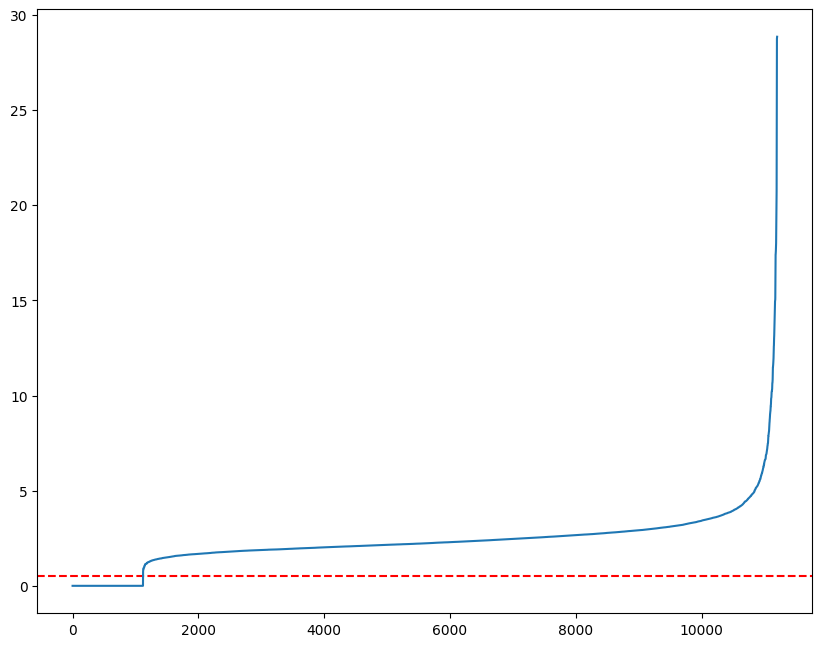

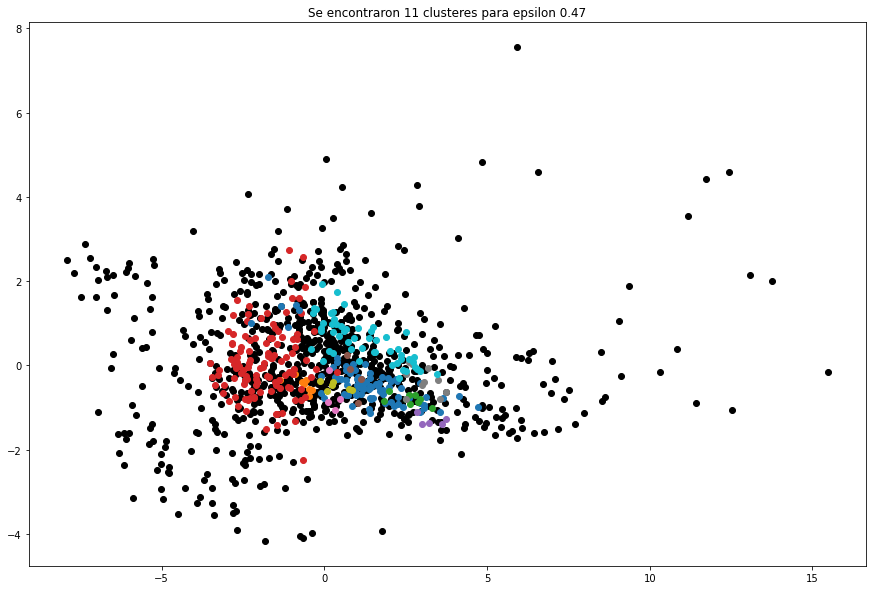

In [159]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

X=reducidainilimpia.copy()

model = pca(n_components=0.95 ,normalize=True,verbose=True)
results = model.fit_transform(X)
fig, ax = model.plot()

loadings_pca=model.results['loadings'].transpose()
display(loadings_pca)


neigh = NearestNeighbors(n_neighbors = 10)
nbrs = neigh.fit(results['PC'])
distancias, indices = nbrs.kneighbors(results['PC'])
distancias = np.sort(distancias.flatten())
fig=plt.figure(figsize=(10,8), dpi= 100, facecolor='w', edgecolor='k')
plt.axhline(y = 0.5, color = 'r', linestyle = '--')
plt.plot(distancias)

from kneed import KneeLocator

i = np.arange(len(distancias))
knee = KneeLocator(i, distancias, S=1, curve='convex', direction='increasing', interp_method='polynomial')

print(distancias[knee.knee])



X=results['PC'].to_numpy()

db = DBSCAN(eps = 1.8, min_samples = 5).fit(X)
clusteres = db.labels_

n_clusteres = len(set(clusteres)) - (1 if -1 in clusteres else 0)
resultado = pd.DataFrame(X).assign(Cluster = clusteres)
descripcion['Cluster']=clusteres
plt.figure(figsize=(15,10))
for k in np.unique(clusteres):
    if k != -1:
        plt.scatter(
            x = resultado.loc[resultado.Cluster == k, 0], 
            y = resultado.loc[resultado.Cluster == k, 4]
            )
    else:
        plt.scatter(
            x = resultado.loc[resultado.Cluster == k, 0], 
            y = resultado.loc[resultado.Cluster == k, 4],
            c = "black"
            )
plt.title('Se encontraron %d clusteres para epsilon %0.2f' % (n_clusteres, 0.47))

resultado
descripcion


In [122]:
descripcion[descripcion.Cluster==7].head(50)

,Municipality code,Municipality,AfrocolombianPopulation(%),Cases2019,Population2019,ratioPoblacionCasos,Cluster
461,25040,Anolaima,0.47,5,14161,0.000353,7
462,25053,Arbeláez,0.09,7,10825,0.000647,7
509,25402,La Vega,0.14,15,17830,0.000841,7
520,25491,Nocaima,0.08,3,6317,0.000475,7
522,25513,Pacho,0.16,16,25046,0.000639,7
534,25645,San Antonio del Tequendama,0.15,7,12340,0.000567,7
537,25658,San Francisco,0.17,7,11316,0.000619,7
539,25718,Sasaima,0.07,14,11104,0.001261,7
542,25743,Silvania,0.13,17,22550,0.000754,7
553,25797,Tena,0.10,22,10065,0.002186,7


In [113]:
descripcion.sort_values('Cases2019')

,Municipality code,Municipality,AfrocolombianPopulation(%),Cases2019,Population2019,ratioPoblacionCasos,Cluster
148,11001,"Bogotá, D.C.",0.93,0,7592871,0.000000,-1
855,68132,California,0.27,0,2186,0.000000,-1
854,68121,Cabrera,0.06,0,1983,0.000000,-1
978,73347,Herveo,0.08,0,7266,0.000000,-1
846,68013,Aguada,0.30,0,1858,0.000000,-1
...,...,...,...,...,...,...,...
932,70001,Sincelejo,3.36,3693,286635,0.012884,-1
1005,76001,Cali,14.44,3890,2241491,0.001735,-1
958,73001,Ibagué,0.45,5130,536087,0.009569,-1
604,41001,Neiva,0.63,5459,361049,0.015120,-1


**CLUSTERING JERARQUICO**

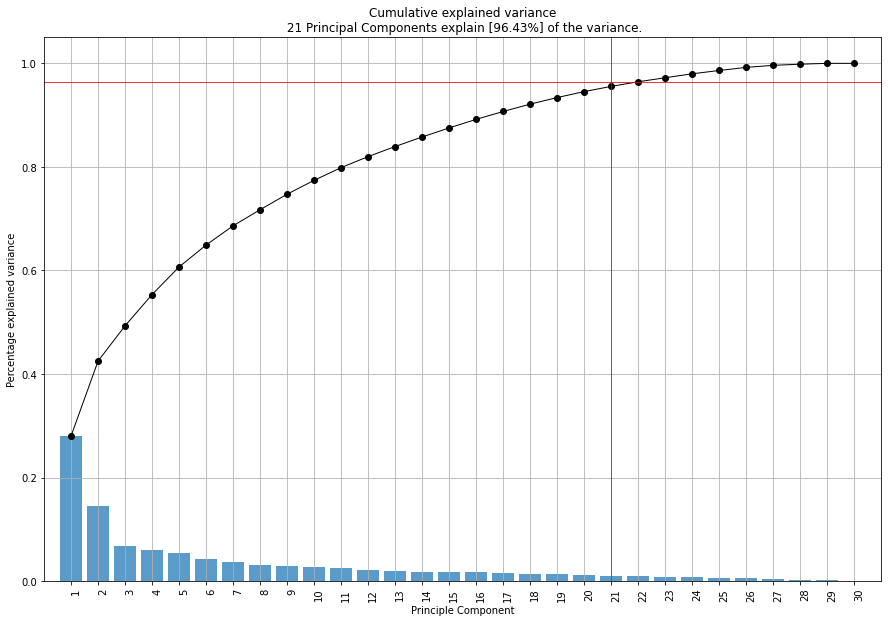

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
Municipality code,-0.056886,0.043731,-0.022049,-0.113373,0.442350,0.321293,-0.263727,0.314189,0.342159,0.154277,...,0.278395,-0.375219,-0.044523,-0.032725,-0.327955,0.043476,-0.118855,-0.066233,0.101722,0.004906
Age0-4(%),-0.233001,0.252084,-0.017994,-0.113743,-0.053824,-0.071283,0.144312,-0.092224,-0.108993,-0.024727,...,0.011704,-0.102766,-0.200401,-0.162188,-0.212178,0.003467,-0.006632,0.068023,-0.084949,0.054647
Age5-14(%),-0.262633,0.199441,0.104334,-0.160567,0.059847,-0.057053,0.074439,-0.069713,-0.125456,-0.002205,...,0.075189,-0.122002,-0.095719,-0.133682,-0.089760,-0.104958,-0.019390,0.228444,-0.221899,-0.171966
Age15-29(%),-0.114329,0.301675,-0.122565,-0.134756,-0.062521,0.212618,0.352386,0.054624,0.136781,-0.159004,...,-0.218367,0.008700,0.102376,-0.137661,0.079041,-0.048330,0.118462,-0.293271,0.399934,0.063420
Age>30(%),0.244072,-0.286147,-0.004891,0.166517,0.005326,-0.031925,-0.210754,0.040288,0.043272,0.067915,...,0.039549,0.088497,0.063710,0.165565,0.072405,0.073875,-0.032838,-0.028676,-0.011005,0.054378
AfrocolombianPopulation(%),-0.104381,0.175368,-0.068485,-0.012117,-0.422054,-0.199735,-0.374410,-0.122425,0.196195,-0.142325,...,0.140865,-0.368477,0.011359,-0.050139,0.117839,0.123818,0.160711,-0.285051,-0.041241,0.347049
IndianPopulation(%),-0.156858,0.135921,0.295475,-0.148259,0.082007,0.350136,0.010252,0.081576,-0.089994,0.282723,...,-0.029799,0.350375,-0.157027,0.228422,0.137278,-0.018093,0.126940,-0.063814,-0.163544,0.458581
PeoplewithDisabilities(%),0.049381,-0.279831,0.173681,0.143156,-0.027175,0.178577,-0.161493,-0.102302,0.317676,-0.248497,...,-0.331732,0.100844,-0.235354,-0.345691,-0.234150,-0.417160,0.265148,-0.069879,-0.156565,0.013055
Peoplewhocannotreadorwrite(%),-0.240452,-0.009965,0.087743,0.176780,-0.068884,-0.318956,-0.139873,-0.029102,-0.114148,0.058797,...,-0.023210,0.239590,-0.122983,0.037911,-0.451308,0.102307,-0.216814,-0.140712,0.306757,0.297069
Secondary/HigherEducation(%),0.239770,0.198668,-0.255619,-0.050455,-0.105854,0.135394,-0.005883,0.058317,-0.069185,0.133607,...,0.107489,-0.052957,0.026866,0.043249,0.158822,-0.194789,0.255154,-0.134489,-0.028474,-0.057424


<Figure size 432x288 with 0 Axes>

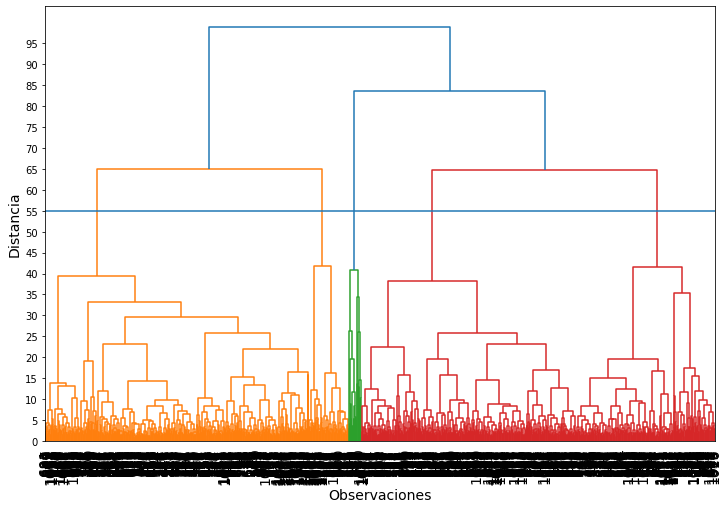

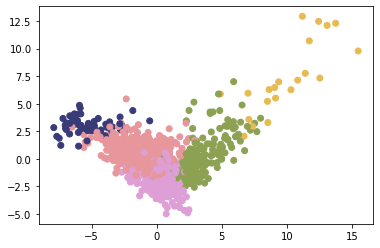

In [177]:
from random import seed
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering

X=reducidainilimpia.copy()
model = pca(n_components=0.95 ,normalize=True,verbose=True)
results = model.fit_transform(X)
fig, ax = model.plot()

loadings_pca=model.results['loadings'].transpose()
display(loadings_pca)
X=results['PC'].to_numpy()




dist = pdist(X, metric='euclidean')
Z = linkage(dist, method='ward')


import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

fig, ax = plt.subplots(figsize=(12, 8))
d = dendrogram(Z, show_leaf_counts=True, leaf_font_size=14, ax=ax)
ax.set_xlabel('Observaciones', fontsize=14)
ax.set_yticks(np.arange(0, 100, 5))
ax.set_ylabel('Distancia', fontsize=14)
ax.hlines(55,0,20000)
plt.show()

cluster_sk = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster_sk =cluster_sk.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=cluster_sk, cmap='tab20b')
plt.show()

In [181]:
descripcion['Cluster']=cluster_sk
descripcion.groupby('Cluster')['Cluster'].count()

Cluster
0     67
1    231
2     21
3    441
4    360
Name: Cluster, dtype: int64

In [185]:
display(descripcion.describe())

for k in np.unique(cluster_sk):
    print('Cluster',k)
    print(descripcion[descripcion['Cluster']==k]['ratioPoblacionCasos'].mean(), '- Media del ratioPoblacionCasos')
    display(descripcion[descripcion['Cluster']==k].head(10))

print("Analsis cluster x ratioPoblacionCasos")
descripcion.sort_values('ratioPoblacionCasos')

,Municipality code,AfrocolombianPopulation(%),Cases2019,Population2019,ratioPoblacionCasos,Cluster
count,1120.000000,1120.000000,1120.000000,1.120000e+03,1120.000000,1120.000000
mean,38658.553571,7.052393,113.231250,4.407453e+04,0.003060,2.710714
std,26544.627772,19.319731,443.491883,2.601129e+05,0.005449,1.273316
min,5001.000000,0.000000,0.000000,2.880000e+02,0.000000,0.000000
25%,15675.250000,0.180000,1.000000,6.636500e+03,0.000051,1.000000
50%,25831.000000,0.410000,10.000000,1.281500e+04,0.000759,3.000000
75%,66485.000000,1.617500,75.000000,2.747125e+04,0.003531,4.000000
max,99773.000000,97.300000,8258.000000,7.592871e+06,0.047612,4.000000


Cluster 0
0.0006123784015181153 - Media del ratioPoblacionCasos


,Municipality code,Municipality,AfrocolombianPopulation(%),Cases2019,Population2019,ratioPoblacionCasos,Cluster
70,5475,Murindó,52.00,5,5088,0.000983,0
119,5873,Vigía del Fuerte,82.11,1,9265,0.000108,0
374,19318,Guapí,94.96,5,27619,0.000181,0
379,19418,López de Micay,85.35,2,18761,0.000107,0
399,19809,Timbiquí,79.87,5,26363,0.000190,0
574,27001,Quibdó,90.99,57,130042,0.000438,0
575,27006,Acandí,87.02,12,14085,0.000852,0
576,27025,Alto Baudó,32.52,1,27982,0.000036,0
577,27050,Atrato,96.10,4,6145,0.000651,0
578,27073,Bagadó,34.66,1,11149,0.000090,0


Cluster 1
0.0017884848929387211 - Media del ratioPoblacionCasos


,Municipality code,Municipality,AfrocolombianPopulation(%),Cases2019,Population2019,ratioPoblacionCasos,Cluster
3,5021,Alejandría,0.31,0,4669,0.000000,1
4,5030,Amagá,0.48,16,30777,0.000520,1
5,5031,Amalfi,0.50,6,26552,0.000226,1
6,5034,Andes,0.60,1,43713,0.000023,1
10,5042,Santa Fé de Antioquia,3.31,85,26598,0.003196,1
16,5079,Barbosa,0.51,40,53242,0.000751,1
17,5086,Belmira,39.22,0,6054,0.000000,1
18,5088,Bello,1.94,88,538527,0.000163,1
21,5101,Ciudad Bolívar,0.82,10,26160,0.000382,1
26,5129,Caldas,0.54,13,81658,0.000159,1


Cluster 2
0.0007885121509758625 - Media del ratioPoblacionCasos


,Municipality code,Municipality,AfrocolombianPopulation(%),Cases2019,Population2019,ratioPoblacionCasos,Cluster
0,5001,Medellín,2.51,1276,2483545,0.000514,2
46,5266,Envigado,0.66,61,236114,0.000258,2
58,5360,Itagüí,0.83,56,283794,0.000197,2
83,5607,Retiro,0.29,0,24185,0.000000,2
86,5631,Sabaneta,0.72,20,85484,0.000234,2
125,8001,Barranquilla,5.21,1855,1243056,0.001492,2
138,8573,Puerto Colombia,1.39,82,51695,0.001586,2
144,8758,Soledad,1.32,611,638065,0.000958,2
148,11001,"Bogotá, D.C.",0.93,0,7592871,0.000000,2
195,15001,Tunja,0.39,0,176347,0.000000,2


Cluster 3
0.005731494402963891 - Media del ratioPoblacionCasos


,Municipality code,Municipality,AfrocolombianPopulation(%),Cases2019,Population2019,ratioPoblacionCasos,Cluster
8,5038,Angostura,0.50,0,11462,0.000000,3
9,5040,Anorí,1.68,16,18737,0.000854,3
11,5044,Anzá,0.34,5,7085,0.000706,3
12,5045,Apartadó,37.80,578,124647,0.004637,3
13,5051,Arboletes,27.05,49,29942,0.001636,3
14,5055,Argelia,0.84,0,7577,0.000000,3
20,5093,Betulia,0.47,1,15736,0.000064,3
23,5113,Buriticá,0.36,10,9502,0.001052,3
24,5120,Cáceres,2.26,25,29716,0.000841,3
28,5138,Cañasgordas,0.34,3,15490,0.000194,3


Cluster 4
0.0011902730612180633 - Media del ratioPoblacionCasos


,Municipality code,Municipality,AfrocolombianPopulation(%),Cases2019,Population2019,ratioPoblacionCasos,Cluster
1,5002,Abejorral,0.35,0,20258,0.000000,4
2,5004,Abriaquí,1.99,2,2710,0.000738,4
7,5036,Angelópolis,0.54,0,5790,0.000000,4
15,5059,Armenia,0.18,1,5085,0.000197,4
19,5091,Betania,0.75,2,10274,0.000195,4
22,5107,Briceño,0.52,7,8065,0.000868,4
25,5125,Caicedo,0.23,0,8420,0.000000,4
27,5134,Campamento,0.30,0,9202,0.000000,4
43,5240,Ebéjico,0.45,0,12108,0.000000,4
51,5310,Gómez Plata,0.80,2,9828,0.000204,4


Analsis cluster x ratioPoblacionCasos


,Municipality code,Municipality,AfrocolombianPopulation(%),Cases2019,Population2019,ratioPoblacionCasos,Cluster
362,19022,Almaguer,0.07,0,18263,0.000000,4
212,15180,Chiscas,0.03,0,3924,0.000000,4
211,15176,Chiquinquirá,0.37,0,57101,0.000000,1
210,15172,Chinavita,0.04,0,3198,0.000000,4
209,15162,Cerinza,0.19,0,3703,0.000000,4
...,...,...,...,...,...,...,...
514,25438,Medina,0.18,260,8064,0.032242,3
1088,91001,Leticia,0.88,1676,48918,0.034261,3
713,50689,San Martín,0.75,953,26571,0.035866,3
856,68147,Capitanejo,0.39,250,5479,0.045629,3
